In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [5]:
df.shape

(74051, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [7]:
df['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [9]:
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
  
df['Sex'].unique()

array([1, 2, 0])

In [10]:
df.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.055016,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.820647,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,0.000000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,2.000000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [11]:
df.drop(columns='id',inplace=True)

### Missing Values

In [12]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

<Axes: >

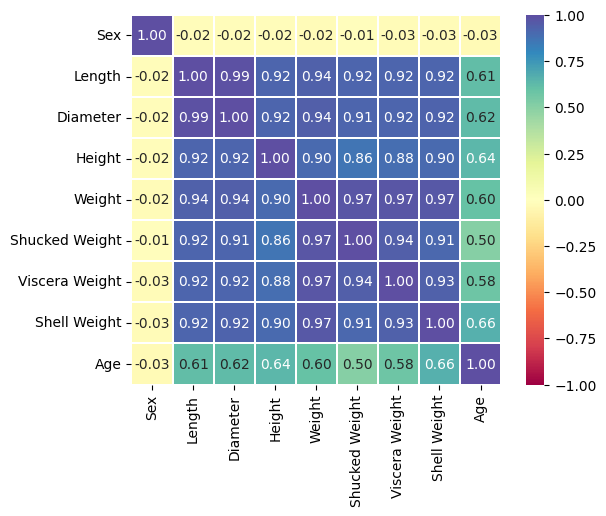

In [13]:
correlation = df.corr()
# creating a colormap
colormap = sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(correlation,annot=True,fmt='.2f',cmap=colormap,linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True)

In [14]:
x = df.drop(columns=['Age']).copy()
y = df['Age'].copy()

In [15]:
test_df.drop('id',axis=1,inplace=True)
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])
test_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


### SPLIT DATA

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1,random_state=42)

In [18]:
results = pd.DataFrame({'name':[],'training_mae':[],'testing_mae':[],'best_parameters':[]})

In [19]:
iterations = 10000

## Model

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as xgbr
from catboost import CatBoostRegressor as cbr
from lightgbm import LGBMRegressor as lgbmr

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.decomposition import PCA

### Lightgbm

In [22]:
lgb = lgbmr()

In [23]:
def regression_metrics(y_test,y_pred):
    print("MAE:\t",round(mae(y_test,y_pred),4))
    return round(mae(y_test,y_pred),4)

In [26]:
import lightgbm as lgb

In [27]:
# Create a LightGBM dataset for training with features X_train and labels Y_train 
train_data = lgb.Dataset(x_train, label=y_train) 
  
# Create a LightGBM dataset for testing with features X_val and labels Y_val, 
# and specify the reference dataset as train_data for consistent evaluation 
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data) 

In [28]:
params = { 
    'objective': 'regression', 
    'metric': 'rmse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 31, 
    'learning_rate': 0.05, 
    'feature_fraction': 0.9, 
} 

In [31]:
# Set the number of rounds and train the model with early stopping
num_round = 100
bst = lgb.train(
    params,
    train_data,
    num_round,
    valid_sets=[test_data],
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 59980, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 9.969490


In [33]:
# Make predictions
y_pred = bst.predict(x_test, num_iteration=bst.best_iteration)

In [46]:
from sklearn.metrics import mean_squared_error as mse 
from lightgbm import LGBMRegressor 
  
# Create an instance of the LightGBM Regressor with the RMSE metric. 
model = LGBMRegressor(metric='mae') 
  
# Train the model using the training data. 
model.fit(x_train, y_train) 
  
# Make predictions on the training and validation data. 
Y_train = model.predict(x_train) 
y_pred = model.predict(x_test) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 59980, number of used features: 8
[LightGBM] [Info] Start training from score 9.969490


In [47]:
# Calculate and print the Root Mean Squared Error (RMSE) for training and validation predictions. 
print("Training RMSE: ", np.sqrt(mse(Y_train, y_train))) 
print("Validation RMSE: ", np.sqrt(mse(y_pred, y_test)))

Training RMSE:  0.08102263268710168
Validation RMSE:  2.055627344305822


In [39]:
lgb_pred= model.predict(test_df)
lgb_pred

array([ 7.50459003,  7.78213166, 10.80568444, ..., 13.11132765,
       10.07799431, 12.43681833])

In [40]:
import math
def round_off(x):
    return round(x)

In [41]:
lgb_pred = list(map(round_off,lgb_pred))

In [42]:
submission_lgb = pd.DataFrame({'id': sample_df.id, 'Age': lgb_pred})
submission_lgb.to_csv(path_or_buf = 'submission_lgb.csv', index = False)
pd.read_csv('submission_lgb.csv')

,id,Age
0,74051,8
1,74052,8
2,74053,11
3,74054,10
4,74055,8
...,...,...
49363,123414,9
49364,123415,8
49365,123416,13
49366,123417,10


In [51]:

from catboost import CatBoostRegressor

In [52]:
model = CatBoostRegressor(loss_function='RMSE') 
  
# Fit the model on the training data with verbose logging every 100 iterations 
model.fit(x_train, y_train, verbose=100) 

Learning rate set to 0.078182
0:	learn: 2.2629206	total: 11.4ms	remaining: 11.4s
100:	learn: 0.3090937	total: 522ms	remaining: 4.65s
200:	learn: 0.2150106	total: 1.04s	remaining: 4.15s
300:	learn: 0.1737944	total: 1.55s	remaining: 3.6s
400:	learn: 0.1522704	total: 2.03s	remaining: 3.03s
500:	learn: 0.1371065	total: 2.5s	remaining: 2.49s
600:	learn: 0.1256787	total: 2.94s	remaining: 1.95s
700:	learn: 0.1179736	total: 3.4s	remaining: 1.45s
800:	learn: 0.1114675	total: 3.84s	remaining: 954ms
900:	learn: 0.1060185	total: 4.28s	remaining: 470ms
999:	learn: 0.1015963	total: 4.69s	remaining: 0us


In [53]:
from sklearn.metrics import mean_squared_error as mse 
  
# Generate predictions on the training and validation sets using the trained 'model' 
Y_train = model.predict(x_train) 
y_val = model.predict(x_test) 
  
# Calculate and print the Root Mean Squared Error (RMSE) for training and validation sets 
print("Training RMSE: ", np.sqrt(mse(Y_train, y_train))) 
print("Validation RMSE: ", np.sqrt(mse(y_test, y_val))) 

Training RMSE:  0.10159626201732065
Validation RMSE:  2.0487781453551976


In [54]:
cb_pred= model.predict(test_df)
cb_pred

array([ 7.49683846,  7.69293955, 10.87508572, ..., 13.16131956,
       10.04544081, 12.30557722])

In [55]:
cb_pred = list(map(round_off,cb_pred))

In [56]:
submission_cb = pd.DataFrame({'id': sample_df.id, 'Age': cb_pred})
submission_cb.to_csv(path_or_buf = 'submission_cb.csv', index = False)
pd.read_csv('submission_cb.csv')

,id,Age
0,74051,7
1,74052,8
2,74053,11
3,74054,10
4,74055,8
...,...,...
49363,123414,10
49364,123415,8
49365,123416,13
49366,123417,10
